In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

Let's see how Fisher's Linear Discriminant can give us better class separation. First, we sample from two overlapping Gaussian distributions and create a scatter plot of the two sampled classes.

<IPython.core.display.Javascript object>


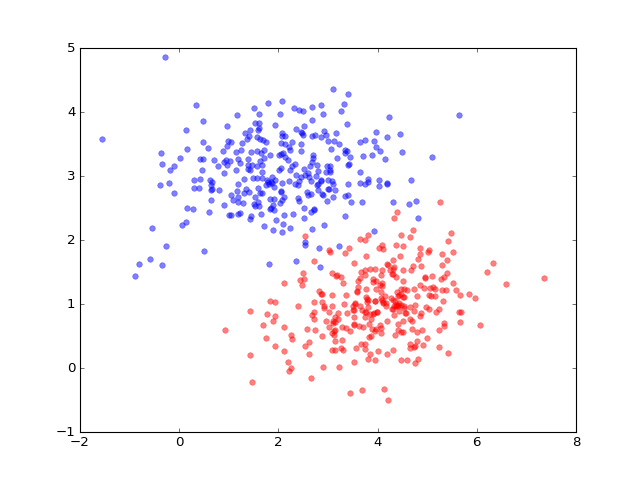

In [2]:
np.random.seed(1)

mean_one = np.array([2, 3])
mean_two = np.array([4, 1])

class_one = np.random.multivariate_normal(mean_one, [[1.5, .2], [0, .3]], 300)
class_two = np.random.multivariate_normal(mean_two, [[1, .2], [0, .3]], 300)

fig, ax = plt.subplots(1)
ax.plot(class_one[:, 0], class_one[:, 1], '.', c='blue', alpha=0.5, markersize=10)
ax.plot(class_two[:, 0], class_two[:, 1], '.', c='red', alpha=0.5, markersize=10)

theta_mean = mean_two - mean_one

Now, we project our data onto the line connection the means of the two distributions and present the histogram plot of the projected data. There is clear overlap of the classes at the center of the two distributions.

In [3]:
class_one_mean_projs = X1 @ theta_mean
class_two_mean_projs = X2 @ theta_mean

plt.figure()
plt.hist([class_one_mean_projs, class_two_mean_projs])

NameError: name 'X1' is not defined

Now, we compute the projection given by Fisher's Linear Discriminant and plot its corresponding histogram. As we can see, the class separation is much better here.

In [ ]:
# Get input and output vectors for both classes
X1 = class_one
Y1 = np.zeros((len(X1), 1))

X2 = class_two
Y2 = np.ones((len(X2), 1))

# Compute class averages
mu_one = (1 / len(X1)) * np.sum(X1, axis=0)
mu_two = (1 / len(X2)) * np.sum(X2, axis=0)

# Create matrices of class means
# mean_one = np.tile(mu_one, (len(X1), 1))
# mean_two = np.tile(mu_two, (len(X2), 1))

# Compute class scatter matrices
S1 = np.zeros((len(mu_one), len(mu_one)))
for i in range(len(X1)):
    mean_vec = X1[i, :] - mu_one
    S1 += np.outer(mean_vec, mean_vec)

S2 = np.zeros((len(mu_two), len(mu_two)))
for j in range(len(X2)):
    mean_vec = X2[j, :] - mu_two
    S2 += np.outer(mean_vec, mean_vec)

# Compute within-class scatter matrix
SW = S1 + S2

# Compute the optimum theta value
theta = np.linalg.inv(SW) @ (mu_two - mu_one)

In [ ]:
# Compute Projections
theta_star = theta[:, None]

class_one_projs = X1 @ theta_star
class_two_projs = X2 @ theta_star

# Plot Projections
plt.figure()
plt.hist([class_one_projs, class_two_projs])